<a href="https://colab.research.google.com/github/Funatlearn/langgraph101/blob/main/5_looping_Agents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Fourth agent, to demonstrates conditional agent
!pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 15.5 MB/s eta 0:00:00


In [6]:

from typing import TypedDict, List # use list, typeddict for state
from langgraph.graph import StateGraph, START, END # graph
import math

In [4]:
# This is State, shared data structure that keeps track of information as application runs.
class State(TypedDict):
  number1: str
  operation: str
  number2: str
  finalNumber: str

def adder(state: State) -> State:
  """ This node adds 2 numbers"""

  state['finalNumber'] = state['number1']+ state["number2"]

  return state

def substractor(state: State) -> State:
  """ This node substracts 2 numbers"""

  state['finalNumber'] = state['number1'] - state["number2"]

  return state

def decide_next_node(state: State) -> State:
  """ This node will select next node of the graph"""

  if state['operation'] == "+":
    return "addition_operation"
  elif state['operation'] == "-":
    return "substraction_operation"



In [13]:
graph = StateGraph(State)

graph.add_node("add_node", adder)
graph.add_node("substract_node", substractor)
graph.add_node("router", lambda state:state) # passthrough

graph.add_edge(START, "router")
graph.add_conditional_edges("router", decide_next_node,
 {
     "addition_operation": "add_node",
     "substraction_operation": "substract_node"
 } )


graph.add_edge("add_node", END)
graph.add_edge("substract_node", END)

app = graph.compile()

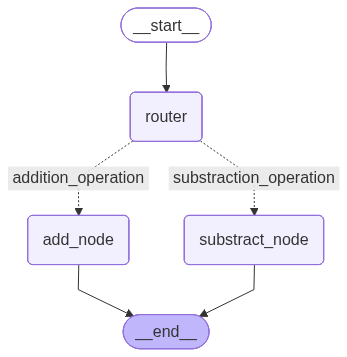

In [14]:
# display graph
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [16]:
# Invoke graph
initial_state_1 = app.invoke({"number1": 10, "operation": "-", "number2":3})
#state = State(number1=10, operation="-", number2=3)
#initial_state_1 = app.invoke(state)
print(initial_state_1)


{'number1': 10, 'operation': '-', 'number2': 3, 'finalNumber': 7}
